# PROYECTO FINAL - ANALISIS DE DATOS EN PYTHON

In [1]:
import pandas as pd

ruta_archivo = '/Users/florenciatorresnieva/Documents/python_work/MySQL/vista_ultima_compra.csv'

# leo el archivo CSV
df = pd.read_csv(ruta_archivo)

# chequeo que este todo correcto
print(df.head())

   id_usuario   nombre    apellido       DNI                  mail  \
0           1   Manuel     Aguilar  33116624      manuel@gmail.com   
1           2  Nicolas  Montagnani  33678790     nicolas@yahoo.com   
2           3    Lucia       Otero  30281872         lua@gmail.com   
3           4    Perla      Parati  28982673     perla@hotmail.com   
4           5    Karen   Filippino  33435612  karen@hotmail.com.ar   

     telefono            direccion     zona_entrega        ultima_compra  
0    15678945      Entre Rios 2307           Olivos  2023-07-09 14:15:10  
1  1566541323  Lorenzo Vidaschi 30       Monteverde  2023-06-15 20:10:10  
2  1534567823         Pacheco 2345            Munro  2023-07-14 11:32:20  
3   159838763       Av. Maipú 5655    Vicente Lopez  2023-06-12 13:15:10  
4    11236789  Rodrigo Pertegas 34  Villa Ballester  2023-07-09 14:15:10  


### Evolución de las compras a lo largo del tiempo

#### vista_ultima_compra

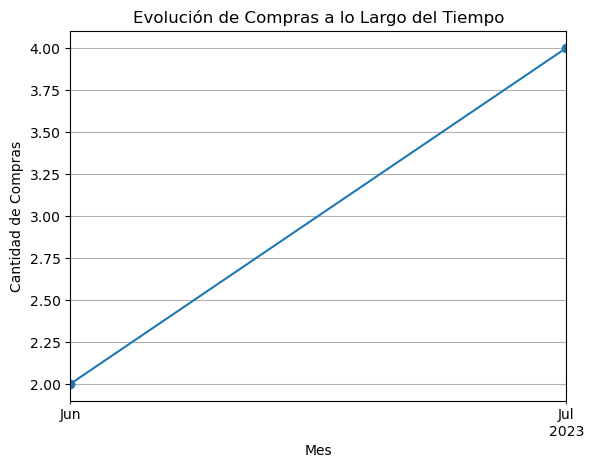

In [2]:
import matplotlib.pyplot as plt

df['ultima_compra'] = pd.to_datetime(df['ultima_compra'])

# agrupo por mes y cuento la cantidad de compras por mes
compras_por_mes = df.resample('M', on='ultima_compra').size()

# grafico de lineas:
compras_por_mes.plot(kind='line', marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Compras')
plt.title('Evolución de Compras a lo Largo del Tiempo')
plt.grid(True)
plt.show()

### Análsis de datos de ganancia por unidad y ganancia total

#### vista_productos_ganancia

In [3]:
# hago lo mismo pero con la otra vista
ruta_archivo2 = '/Users/florenciatorresnieva/Documents/python_work/MySQL/vista_productos_ganancia.csv'

df2 = pd.read_csv(ruta_archivo2)


print(df2.head())

   id_producto  categoria  stock  costo  precio_venta  ganancia_por_unidad  \
0            8    Higiene      0      4            10                    6   
1           12   Limpieza     18     12            18                    6   
2           23  Alimentos     20      7            12                    5   
3           34  Alimentos     15      4             8                    4   
4           56    Higiene     30     10            15                    5   

   ganancia_total  
0               0  
1             108  
2             100  
3              60  
4             150  


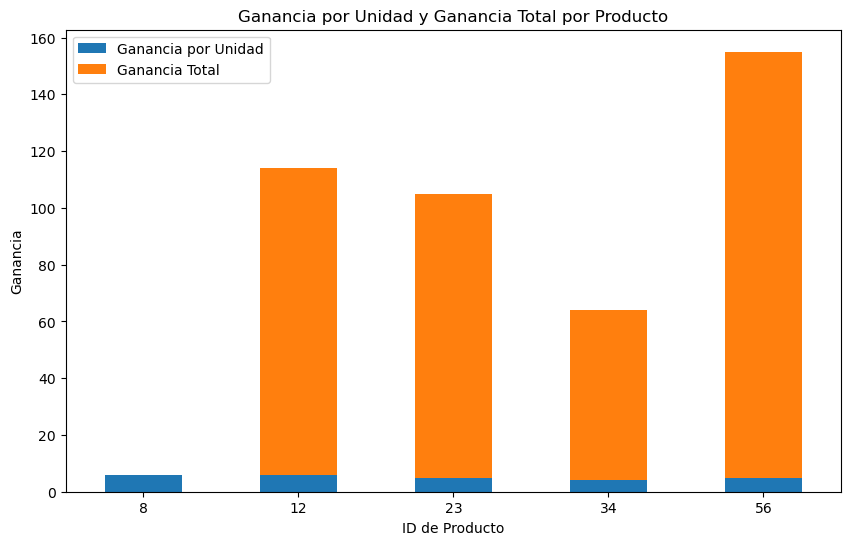

In [4]:
df2['ganancia_por_unidad'] = pd.to_numeric(df2['ganancia_por_unidad'])
df2['ganancia_total'] = pd.to_numeric(df2['ganancia_total'])

df_ganancia = df2[['id_producto', 'categoria', 'ganancia_por_unidad', 'ganancia_total']]

df_ganancia.set_index('id_producto', inplace=True)

# gráfico de barras apiladas
ax = df_ganancia[['ganancia_por_unidad', 'ganancia_total']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('ID de Producto')
plt.ylabel('Ganancia')
plt.title('Ganancia por Unidad y Ganancia Total por Producto')
plt.legend(['Ganancia por Unidad', 'Ganancia Total'])
plt.xticks(rotation=0)
plt.show()

### Tasa de retención de los clientes

In [8]:
total_clientes = len(df)
clientes_retorno = len(df[df['ultima_compra'].notnull()])
tasa_retencion = (clientes_retorno / total_clientes) * 100
print(f"Tasa de Retención de Clientes: {tasa_retencion:.2f}%")

Tasa de Retención de Clientes: 100.00%


### Análisis de Ventas Mensuales

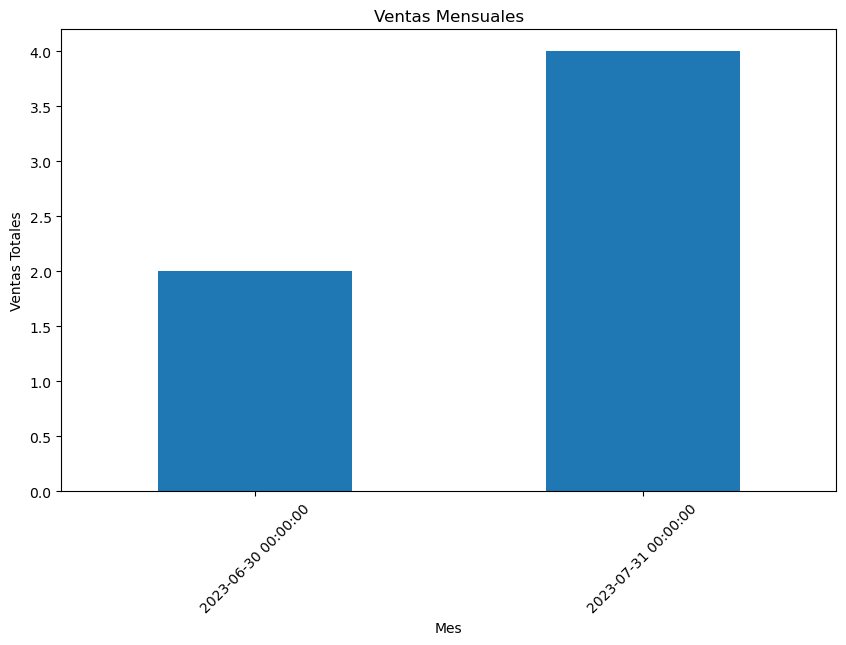

In [10]:
ventas_por_mes = df.resample('M', on='ultima_compra').size()

# gráfico de barras
ventas_por_mes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Ventas Mensuales')
plt.xticks(rotation=45)
plt.show()

### Distribución de productos por categoría

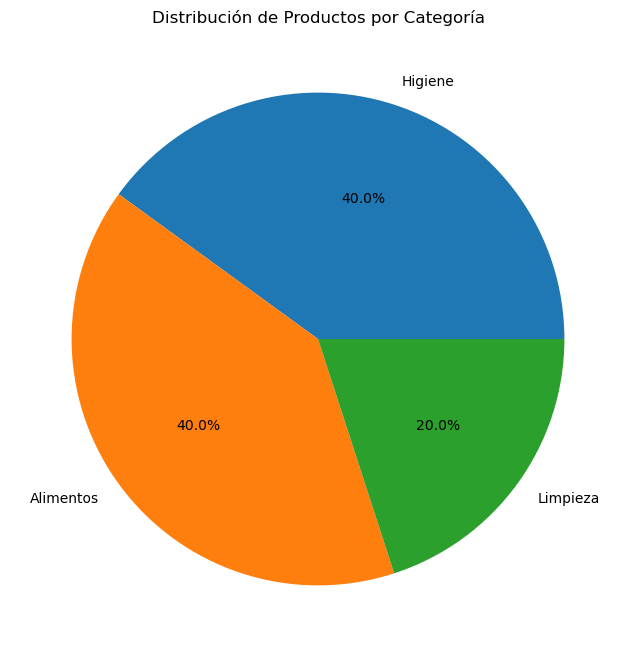

In [12]:
productos_por_categoria = df2['categoria'].value_counts()

# gráfico de pastel
productos_por_categoria.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.title('Distribución de Productos por Categoría')
plt.show()

### Análisis de cantidad de pedidos por zona

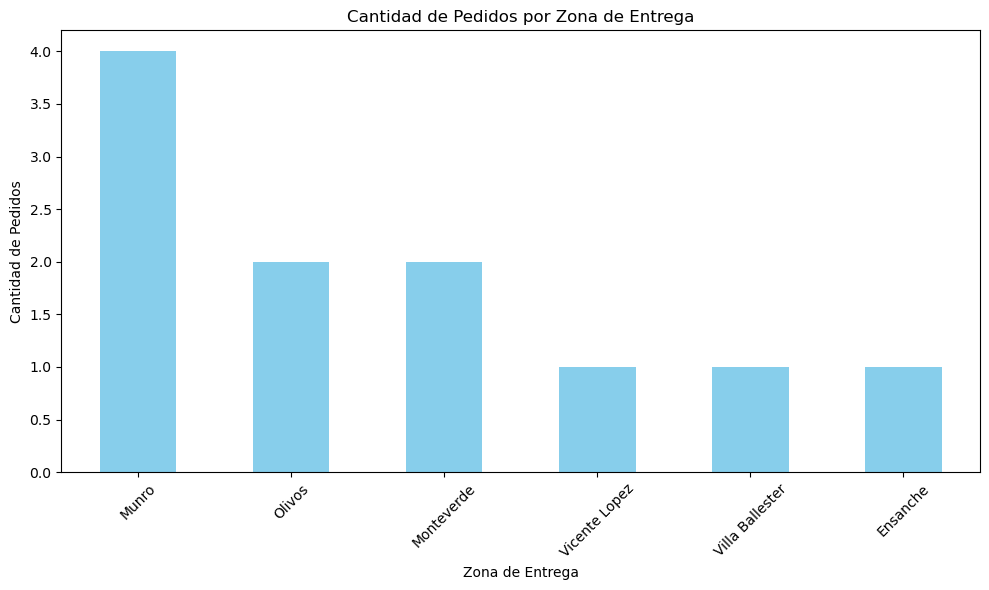

In [5]:
ruta_archivo3 = '/Users/florenciatorresnieva/Documents/python_work/MySQL/Pedidos.csv'
df_pedidos = pd.read_csv(ruta_archivo3)

# cuento la cant de pedidos x zona de entrega
pedidos_por_zona = df_pedidos['zona_entrega'].value_counts()

# gráfico de barras
plt.figure(figsize=(10, 6))
pedidos_por_zona.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Pedidos por Zona de Entrega')
plt.xlabel('Zona de Entrega')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis de productos más vendidos

In [ ]:
# Contar la cantidad de ventas por producto
productos_mas_vendidos = df_pedidos['productos'].value_counts()

# busco los 10 productos más vendidos
top_10_productos = productos_mas_vendidos.head(10)

# gráfico de barras
plt.figure(figsize=(12, 6))
top_10_productos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()